## Test the RRKJ pseudization routine and check the results against ld1.x (carbon, LDA).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# add pstudio to the search path
import sys
sys.path.append('..')

In [2]:
from pstudio import AE, set_output
from pstudio.RRKJ import pseudize_RRKJ
from pstudio.pseudo import calculate_vpot
#set_output(sys.stdout)

ae = AE('C', xcname='LDA', relativity='SR')
ae.run()


scalar relativistic atomic calculation for C (Carbon, Z=6)
configuration: 1s2 2s2 2p2, 6 electrons
exchange-correlation: lda_x+lda_c_pz
2001 radial gridpoints in [1e-05,100]

Converged in 63 iterations

Energy contributions:
------------------------------------------------------------------------
Kinetic:      +37.269733 Ha     +1014.161102 eV 
Ionic:        -87.619337 Ha     -2384.243613 eV 
Hartree:      +17.627276 Ha      +479.662609 eV 
XC:            -4.732032 Ha      -128.765157 eV 
------------------------------------------------------------------------
Total:        -37.454308 Ha     -1019.183627 eV 

state      eigenvalue      eigenvalue        rmax
------------------------------------------------------------------------
1s2         -9.961701 Ha  -271.071678 eV    0.175
2s2         -0.501784 Ha   -13.654238 eV    1.218
2p2         -0.199279 Ha    -5.422666 eV    1.189



In [3]:
# load LD1 results
ld1ae = np.loadtxt('LD1_C-LDA-RRKJ/c.wfc')
ld1ps = np.loadtxt('LD1_C-LDA-RRKJ/cps.wfc')

Pseudizing n=2, l=0
RRKJ3 pseudization: l=0 rc=1.5382
AE norm within rc       : +0.542046
0-th AE derivative at rc: +0.762039
1-th AE derivative at rc: -0.286792
2-th AE derivative at rc: -0.507802
qi               :  [1.21630921 3.14118728 5.15350027]
estimated cutoff : 13.2793 Ha
RRKJ coefficients: [0.9513780131205847, -0.18781536458031645, -0.23024866831416388]
norm error       : 1.1102230246251565e-16




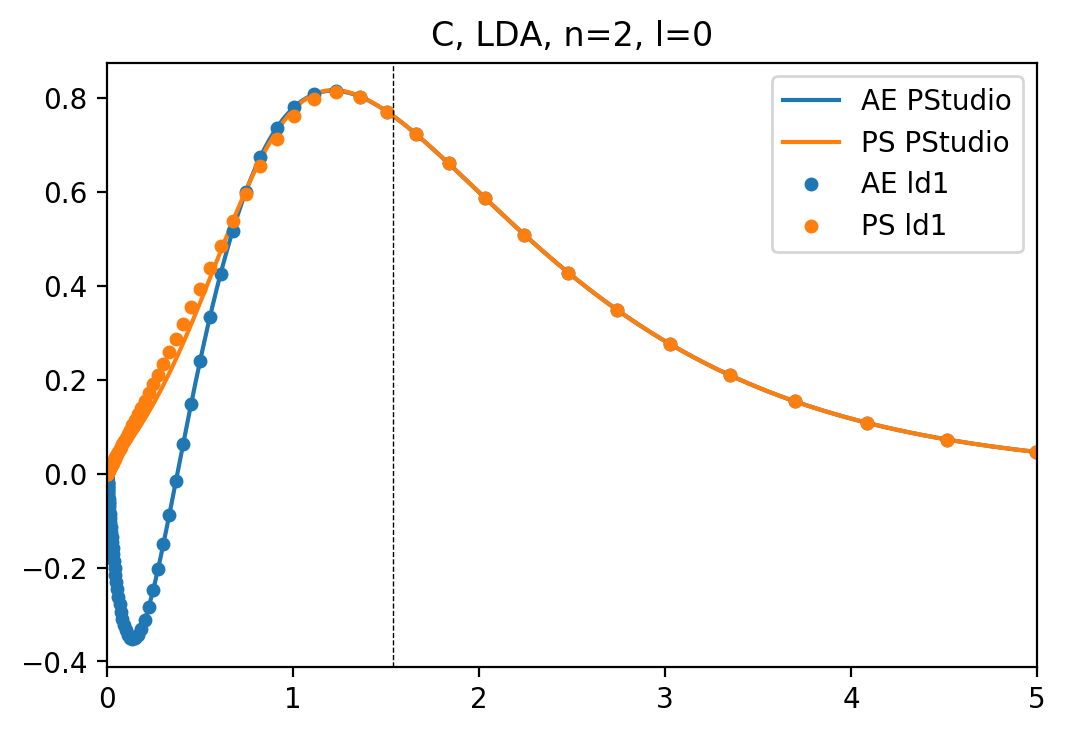


Pseudizing n=2, l=1
RRKJ3 pseudization: l=1 rc=1.5382
AE norm within rc       : +0.475565
0-th AE derivative at rc: +0.675043
1-th AE derivative at rc: -0.161338
2-th AE derivative at rc: -0.287611
qi               :  [1.89253656 4.01747709 6.08313793]
estimated cutoff : 18.5023 Ha
RRKJ coefficients: [1.5167470899184032, 0.7727605389937994, 0.16001845759512995]
norm error       : -1.2378986724570495e-14




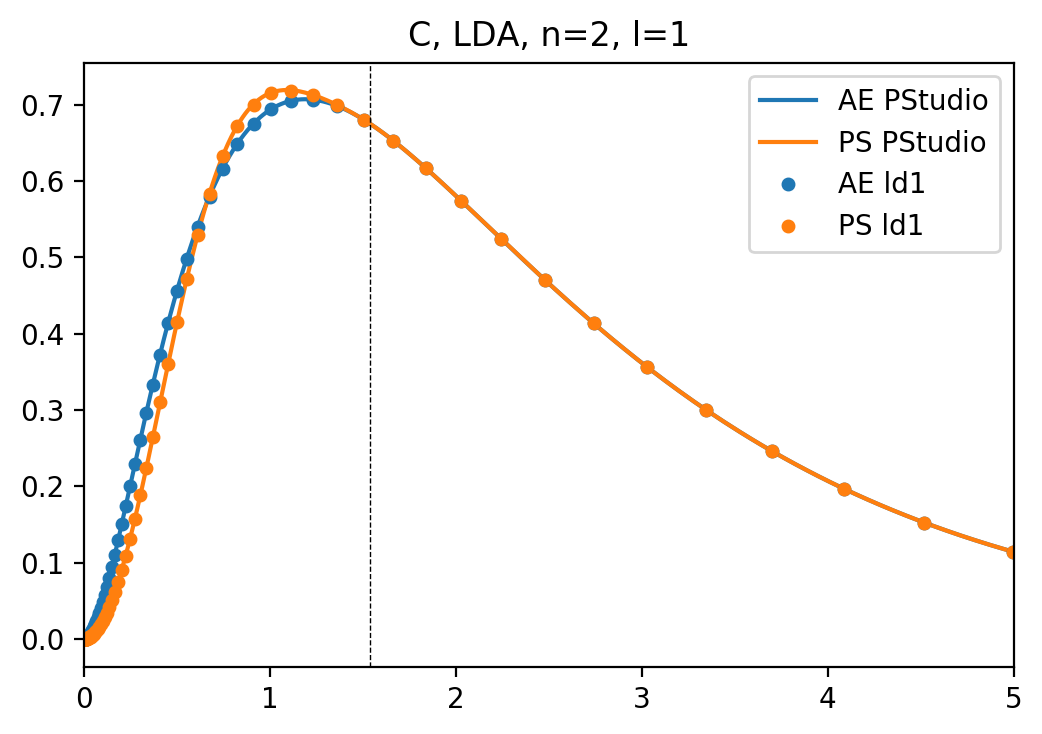

In [4]:
# loop over the valence orbitals
r = ae.rgd.r
ps = []
ppot = []
for orb in ae.orbitals[1:]:
    n = orb.n
    l = orb.l
    aeorb = orb.ur
    rc = 1.54

    print('Pseudizing n={0}, l={1}'.format(n,l))
    psorb, d2psorb = pseudize_RRKJ(aeorb, l, rc, ae.rgd, verbose=True)
    vpot = calculate_vpot(ae.vtot, ae.rgd, rc, l, orb.e, psorb, d2psorb)

    ps.append(psorb)
    ppot.append(vpot)
    print()

    plt.figure(figsize=(6,4), dpi=200)
    plt.plot(r, aeorb, color='C0', label='AE PStudio')
    plt.plot(r, psorb, color='C1', label='PS PStudio')
    if l == 0:
        plt.plot(ld1ae[::20,0], -ld1ae[::20,2], linestyle='none', marker='o', markersize=4, color='C0', label='AE ld1')
        plt.plot(ld1ps[::20,0], ld1ps[::20,1], linestyle='none', marker='o', markersize=4, color='C1', label='PS ld1')
    else:
        plt.plot(ld1ae[::20,0], ld1ae[::20,1], linestyle='none', marker='o', markersize=4, color='C0', label='AE ld1')
        plt.plot(ld1ps[::20,0], ld1ps[::20,2], linestyle='none', marker='o', markersize=4, color='C1', label='PS ld1')
   
    plt.axvline(rc, linestyle='dashed', color='black', linewidth=0.5)
    plt.xlim(0,5)
    plt.title('C, LDA, n={0}, l={1}'.format(n,l))
    plt.legend()
    plt.show()
    
    print()


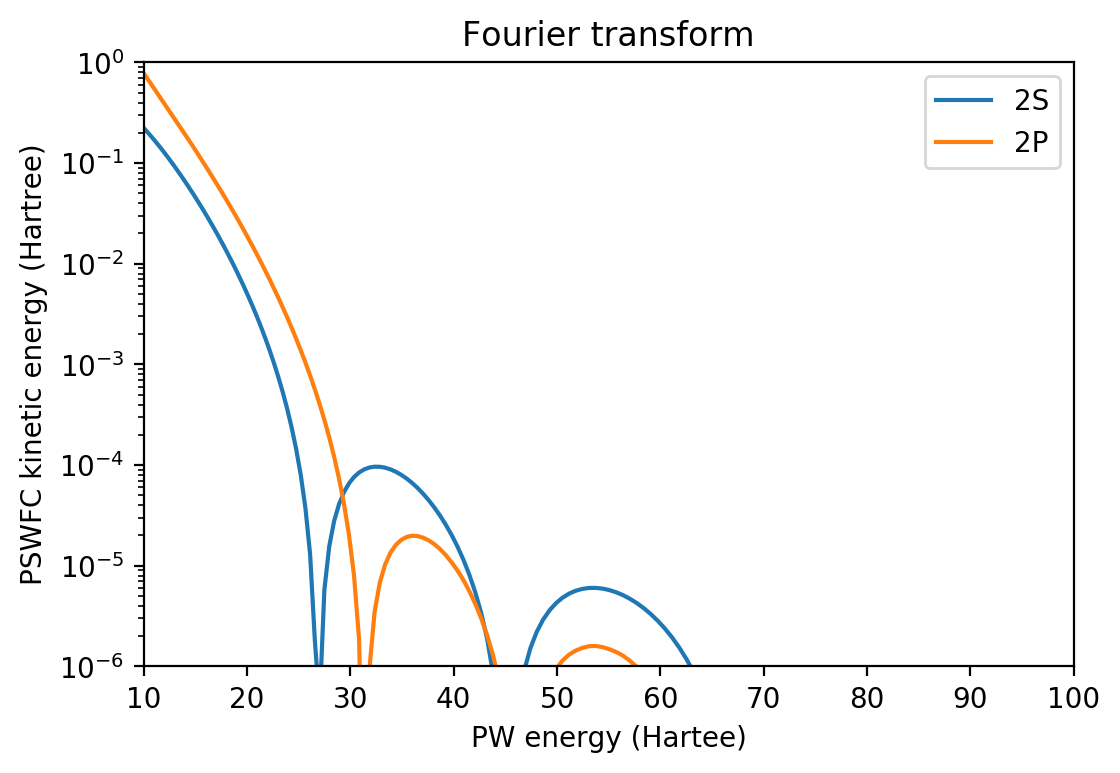

In [5]:
plt.figure(figsize=(6,4), dpi=200)

q, fq = ae.rgd.fft(ps[0], l=0)
plt.plot(0.5*q*q, 0.5*fq*fq*q*q, label='2S')
q, fq = ae.rgd.fft(ps[1], l=1)
plt.plot(0.5*q*q, 0.5*fq*fq*q*q, label='2P')

plt.xlim(10,100)
plt.xlabel('PW energy (Hartee)')

plt.ylim(1e-6, 1)
plt.yscale('log')
plt.ylabel('PSWFC kinetic energy (Hartree)')

plt.title('Fourier transform')
plt.legend()
plt.show()

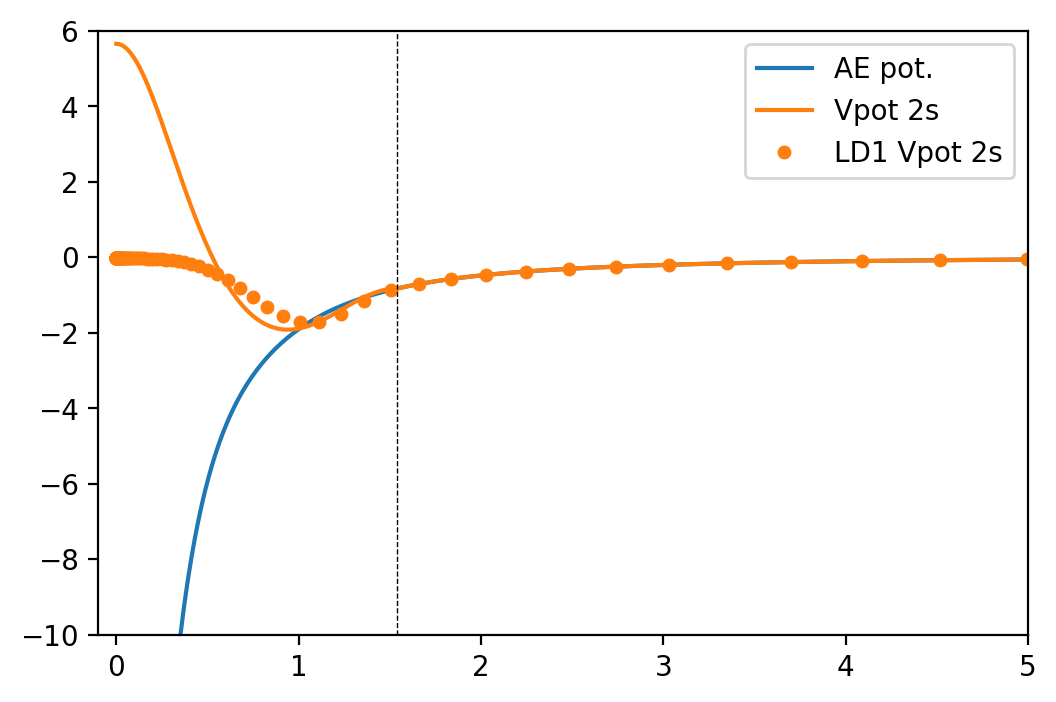

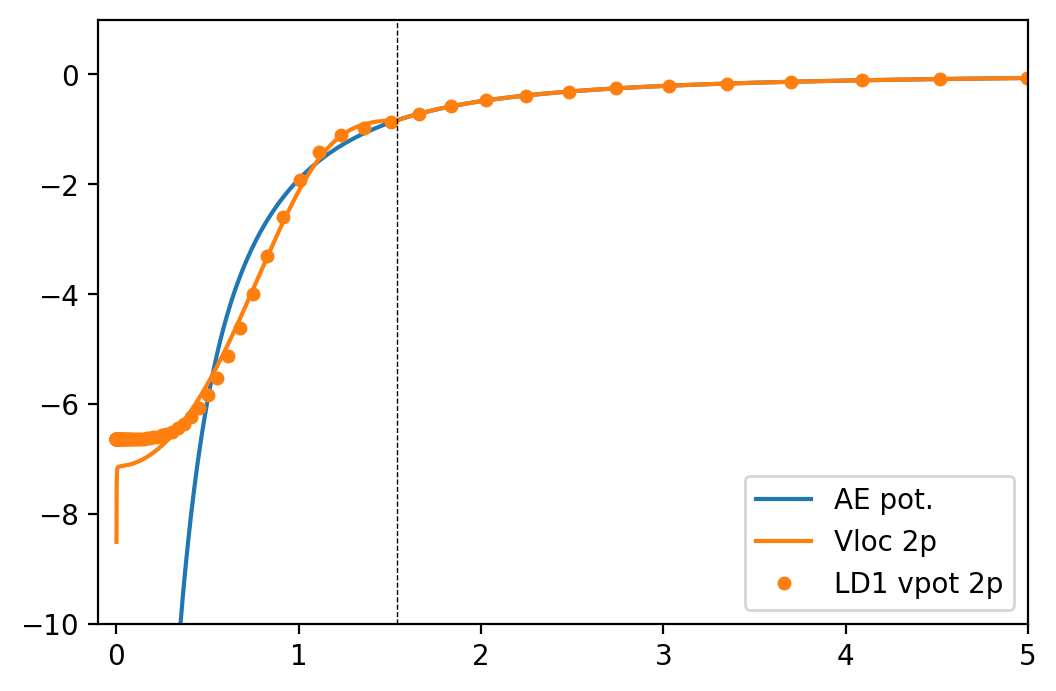

In [7]:
# load the screeend potentials from ld1.x
ld1_vloc2s = np.loadtxt('LD1_C-LDA-RRKJ/c.screen-vloc0')
ld1_vloc2p = np.loadtxt('LD1_C-LDA-RRKJ/c.screen-vloc1')

fig = plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, ae.vtot, color='C0', label='AE pot.')
plt.plot(r, ppot[0], color='C1', label='Vpot 2s')
plt.plot(ld1_vloc2s[::20,1], ld1_vloc2s[::20,2]/2, color='C1', linestyle='none', marker='o', markersize=4, label='LD1 Vpot 2s')

plt.axvline(rc, linestyle='dashed', color='black', linewidth=0.5)
plt.xlim(-0.10,5)
plt.ylim(-10,6)
plt.legend()
plt.show()


fig = plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, ae.vtot, color='C0', label='AE pot.')
plt.plot(r, ppot[1], color='C1', label='Vloc 2p')
plt.plot(ld1_vloc2p[::20,1], ld1_vloc2p[::20,2]/2, color='C1', linestyle='none', marker='o', markersize=4, label='LD1 vpot 2p')

plt.axvline(rc, linestyle='dashed', color='black', linewidth=0.5)
plt.xlim(-0.10,5)
plt.ylim(-10,1)
plt.legend()
plt.show()

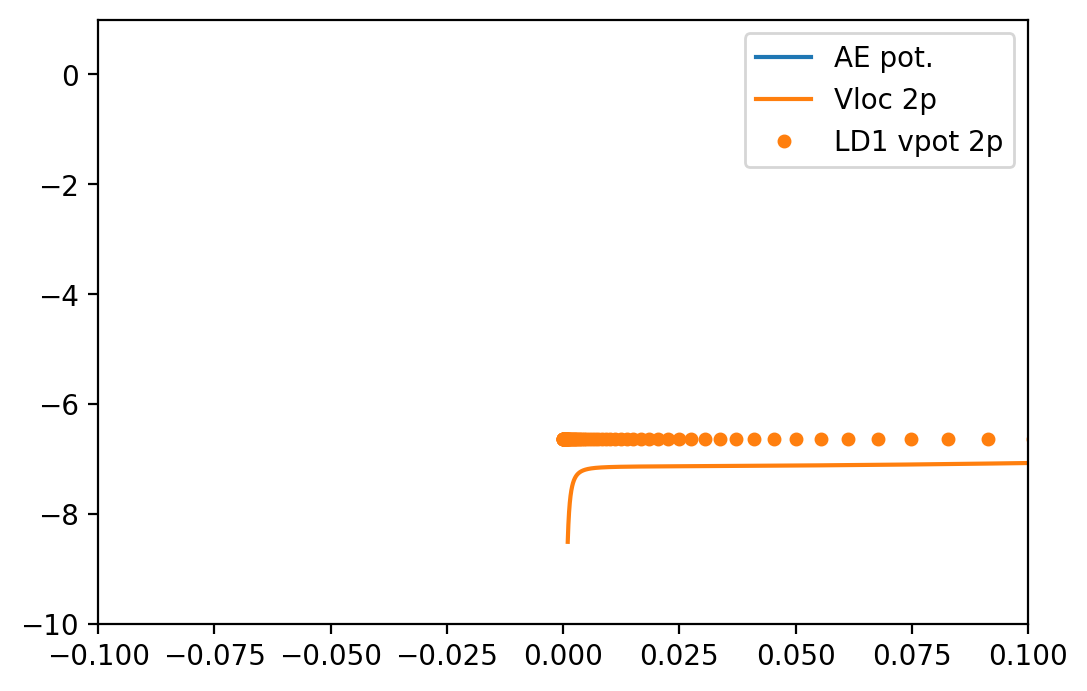

In [9]:
fig = plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, ae.vtot, color='C0', label='AE pot.')
plt.plot(r, ppot[1], color='C1', label='Vloc 2p')
plt.plot(ld1_vloc2p[::20,1], ld1_vloc2p[::20,2]/2, color='C1', linestyle='none', marker='o', markersize=4, label='LD1 vpot 2p')

plt.axvline(rc, linestyle='dashed', color='black', linewidth=0.5)
plt.xlim(-0.10,0.1)
plt.ylim(-10,1)
plt.legend()
plt.show()

Pseudizing n=2, l=0


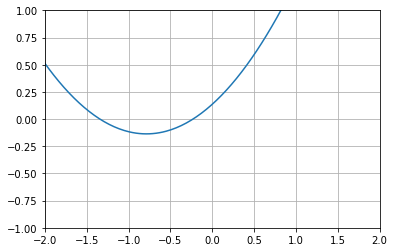


Pseudizing n=2, l=1


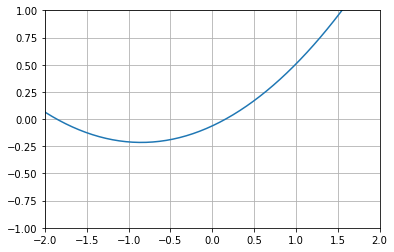

In [7]:
for orb in ae.orbitals[1:]:
    n = orb.n
    l = orb.l
    aeorb = orb.ur
    print('Pseudizing n={0}, l={1}'.format(n,l))
    psorb = pseudize_RRKJ(aeorb, l, 1.54, ae.rgd, verbose=False, plot_c2=True)
    plt.xlim(-2,2)
    plt.ylim(-1,1)
    plt.show()
    print()


In [23]:
import scipy
from scipy.special import spherical_jn
from pstudio.util import deriv1, deriv2

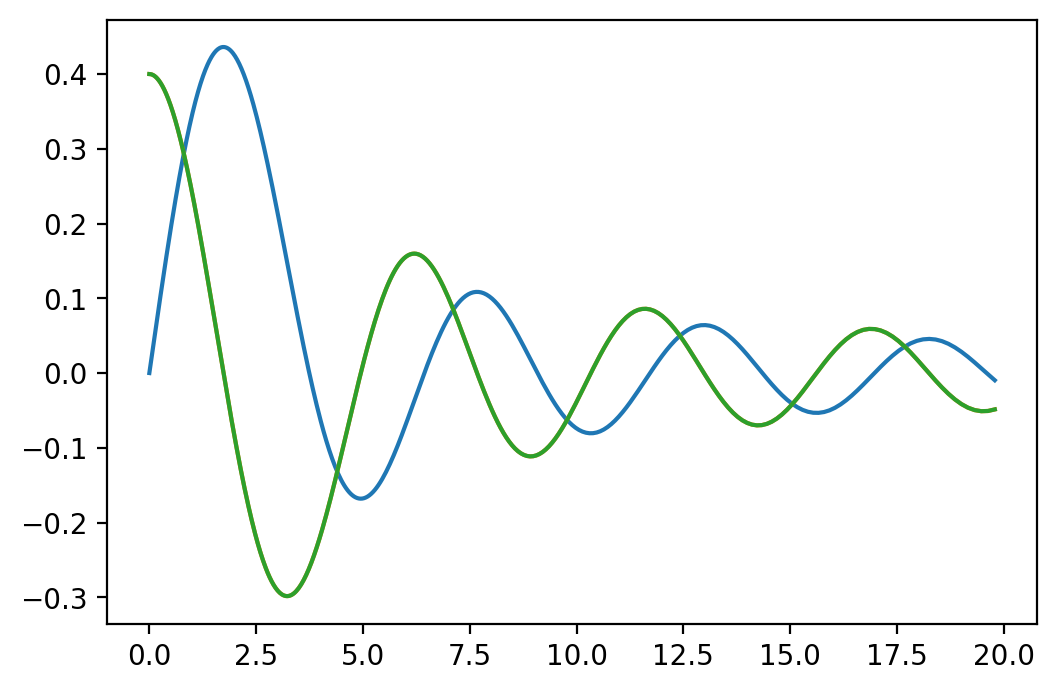

In [60]:
l=1
q = 1.2

def d2spherical_jn(l,x):
    a = (l*(l+1) - x*x)*spherical_jn(l,x) - 2*x*spherical_jn(l,x,True)
    return a/(x*x)

aa=600
raa = r[:1800]

fig = plt.figure(dpi=200)
plt.plot(raa, spherical_jn(l,q*raa))
plt.plot(raa, deriv1(lambda x: spherical_jn(l,q*x), raa))
plt.plot(raa, q*spherical_jn(l,q*raa,True))

#plt.plot(raa, d2spherical_jn(l,q*raa))

#plt.xlim(0,0.01)

plt.show()